In [3]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Arman Nizar\Desktop\Portfolio Projects\Data Analytics\Movie Project Using Coorelation\movies.csv')

In [38]:
df.head()
#print(df[df['name'] == 'Avatar'])

name rating   genre  year                           released  score  \
5445  Avatar  PG-13  Action  2009  December 18, 2009 (United States)    7.8   
7445  Avatar  PG-13  Action  2019     April 26, 2019 (United States)    8.4   
3045  Avatar  PG-13   Drama  1997  December 19, 1997 (United States)    7.8   
6663  Avatar  PG-13  Action  2015  December 18, 2015 (United States)    7.8   
7244  Avatar  PG-13  Action  2018     April 27, 2018 (United States)    8.4   

          votes       director              writer               star  \
5445  1100000.0  James Cameron       James Cameron    Sam Worthington   
7445   903000.0  Anthony Russo  Christopher Markus  Robert Downey Jr.   
3045  1100000.0  James Cameron       James Cameron  Leonardo DiCaprio   
6663   876000.0    J.J. Abrams     Lawrence Kasdan       Daisy Ridley   
7244   897000.0  Anthony Russo  Christopher Markus  Robert Downey Jr.   

            country     budget       gross                company  runtime  
5445  United States  237000000  2847246203  Twentieth Century Fox    162.0  
7445  United States  356000000  2797501328         Marvel Studios    181.0  
3045  United States  200000000  2201647264  Twentieth Century Fox    194.0  
6663  United States  245000000  2069521700              Lucasfilm    138.0  
7244  United States  321000000  2048359754         Marvel Studios    149.0

In [4]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [7]:
# Delete rows with any missing values
df_cleaned = df.dropna()

# Print the shape of the original and cleaned DataFrame
print('Original DataFrame shape:', df.shape)
print('Cleaned DataFrame shape:', df_cleaned.shape)

Original DataFrame shape: (7668, 15)
Cleaned DataFrame shape: (5421, 15)


In [8]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [32]:
df = df.dropna(subset=['budget'])  # Remove rows with NA in the 'budget' column
df = df[df['budget'] != np.inf]    # Remove rows with inf in the 'budget' column
df = df[df['budget'] != -np.inf]   # Remove rows with -inf in the 'budget' column
df['budget'] = df['budget'].astype('int64')


df = df.dropna(subset=['gross'])  # Remove rows with NA in the 'budget' column
df = df[df['gross'] != np.inf]    # Remove rows with inf in the 'budget' column
df = df[df['gross'] != -np.inf]   # Remove rows with -inf in the 'budget' column
df['gross'] = df['gross'].astype('int64')

In [33]:
print(df.dtypes)


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


In [ ]:
#Dropping duplicates 

#df.drop_duplicates()


In [57]:
# Order our Data a little bit to see

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [1]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

NameError: name 'plt' is not defined

<Axes: xlabel='score', ylabel='gross'>

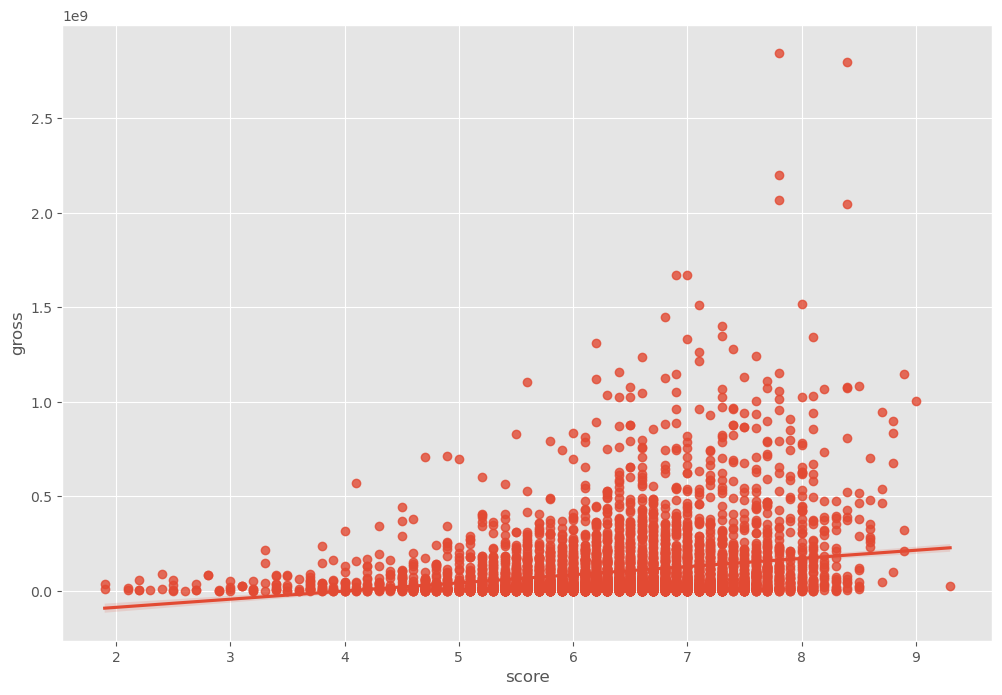

In [53]:
sns.regplot(x="score", y="gross", data=df)

<Axes: xlabel='budget', ylabel='gross'>

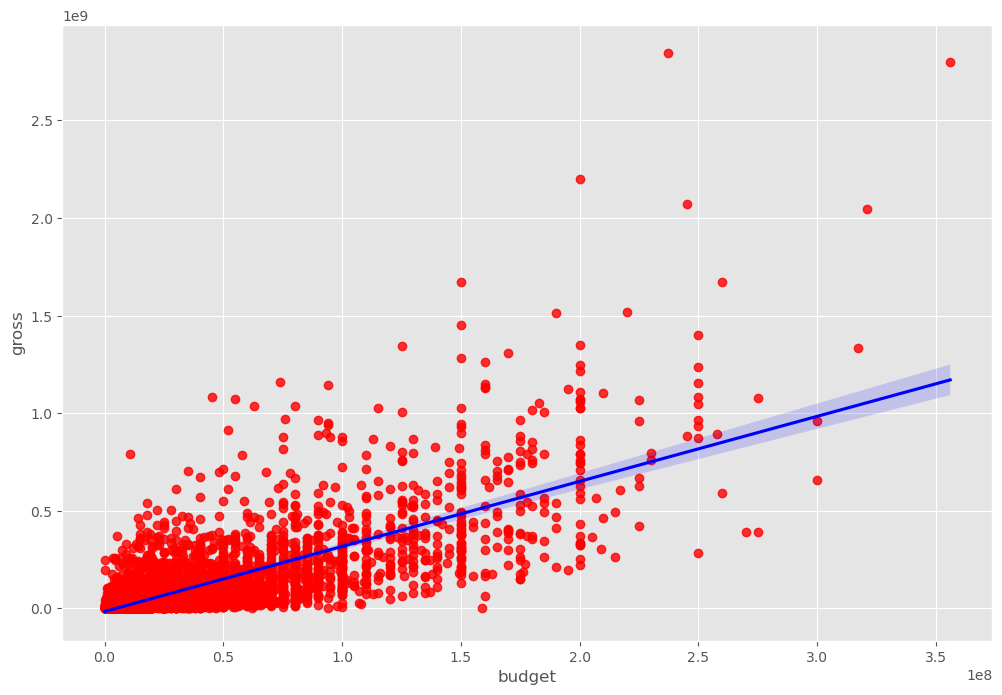

In [18]:
sns.regplot(x="budget", y="gross", data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [50]:
# correlation 
numeric_df = df.select_dtypes(include=[float, int])

# Compute the Pearson correlation matrix
corr = numeric_df.corr(method='pearson')  # pearson kendall spearman
print('Correlation:\n', corr)

Correlation:
              year     score     votes    budget     gross   runtime
year     1.000000  0.055174  0.205758  0.327781  0.274264  0.074203
score    0.055174  1.000000  0.473809  0.071792  0.222143  0.414580
votes    0.205758  0.473809  1.000000  0.440021  0.614904  0.352437
budget   0.327781  0.071792  0.440021  1.000000  0.740395  0.318595
gross    0.274264  0.222143  0.614904  0.740395  1.000000  0.275596
runtime  0.074203  0.414580  0.352437  0.318595  0.275596  1.000000


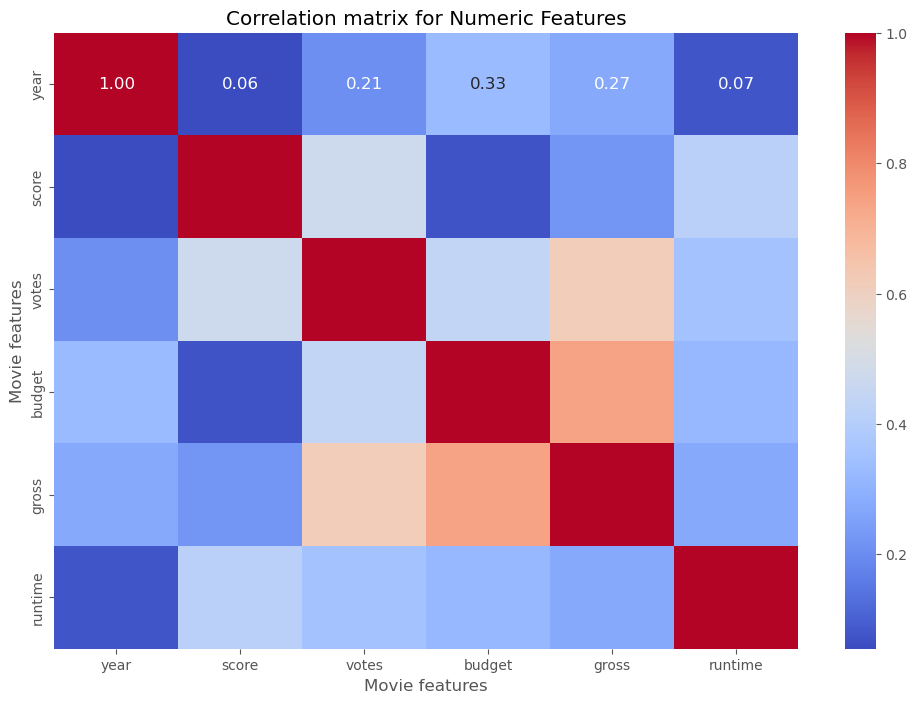

In [51]:
numeric_df = df.select_dtypes(include=[float, int])

correlation_matrix = df.select_dtypes(include=[float, int]).corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, annot_kws={"size": 12})

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

<Axes: >

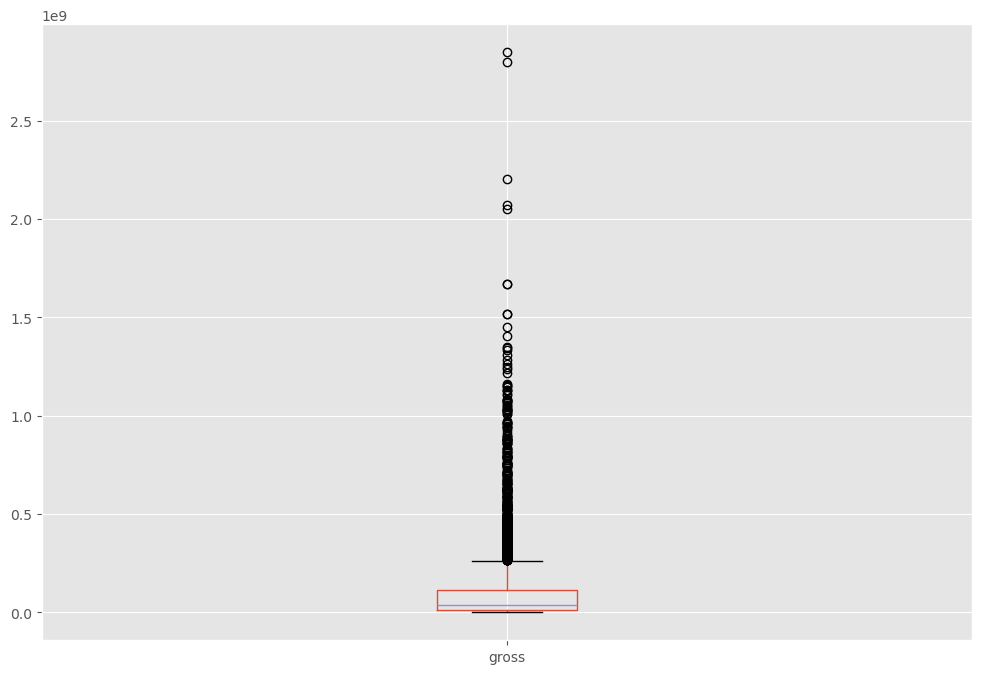

In [52]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [54]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

name    rating     genre      year  released     score     votes  \
name       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
rating     NaN  1.000000  0.031875  0.096560  0.236288 -0.074579  0.119023   
genre      NaN  0.031875  1.000000  0.074748  0.113827  0.049020  0.177988   
year       NaN  0.096560  0.074748  1.000000  0.358792  0.044128  0.285813   
released   NaN  0.236288  0.113827  0.358792  1.000000  0.098692  0.481932   
score      NaN -0.074579  0.049020  0.044128  0.098692  1.000000  0.248673   
votes      NaN  0.119023  0.177988  0.285813  0.481932  0.248673  1.000000   
director   NaN  0.225654  0.132293  0.185075  0.479289  0.176878  0.473698   
writer     NaN  0.246759  0.129560  0.229739  0.541144  0.122700  0.523163   
star       NaN  0.218276  0.143856  0.239223  0.440013  0.139014  0.429642   
country    NaN  0.108129 -0.056457 -0.046607  0.096950 -0.058417  0.013547   
budget     NaN  0.274377  0.173006  0.189760  0.399128 -0.006683  0.318387   
gross      NaN  0.313734  0.184644  0.276600  0.677864  0.140060  0.620593   
company    NaN  0.263213  0.080587  0.134511  0.409398  0.022290  0.345976   
runtime    NaN  0.028568  0.011899  0.037832  0.056643  0.056801  0.087665   

          director    writer      star   country    budget     gross  \
name           NaN       NaN       NaN       NaN       NaN       NaN   
rating    0.225654  0.246759  0.218276  0.108129  0.274377  0.313734   
genre     0.132293  0.129560  0.143856 -0.056457  0.173006  0.184644   
year      0.185075  0.229739  0.239223 -0.046607  0.189760  0.276600   
released  0.479289  0.541144  0.440013  0.096950  0.399128  0.677864   
score     0.176878  0.122700  0.139014 -0.058417 -0.006683  0.140060   
votes     0.473698  0.523163  0.429642  0.013547  0.318387  0.620593   
director  1.000000  0.643213  0.506157  0.121949  0.444054  0.693318   
writer    0.643213  1.000000  0.510510  0.138076  0.449117  0.775945   
star      0.506157  0.510510  1.000000  0.107481  0.460512  0.613920   
country   0.121949  0.138076  0.107481  1.000000  0.114504  0.124293   
budget    0.444054  0.449117  0.460512  0.114504  1.000000  0.534452   
gross     0.693318  0.775945  0.613920  0.124293  0.534452  1.000000   
company   0.527198  0.531137  0.457440  0.178207  0.477554  0.637522   
runtime   0.084415  0.066497  0.095749  0.018683  0.090684  0.087448   

           company   runtime  
name           NaN       NaN  
rating    0.263213  0.028568  
genre     0.080587  0.011899  
year      0.134511  0.037832  
released  0.409398  0.056643  
score     0.022290  0.056801  
votes     0.345976  0.087665  
director  0.527198  0.084415  
writer    0.531137  0.066497  
star      0.457440  0.095749  
country   0.178207  0.018683  
budget    0.477554  0.090684  
gross     0.637522  0.087448  
company   1.000000  0.067842  
runtime   0.067842  1.000000

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


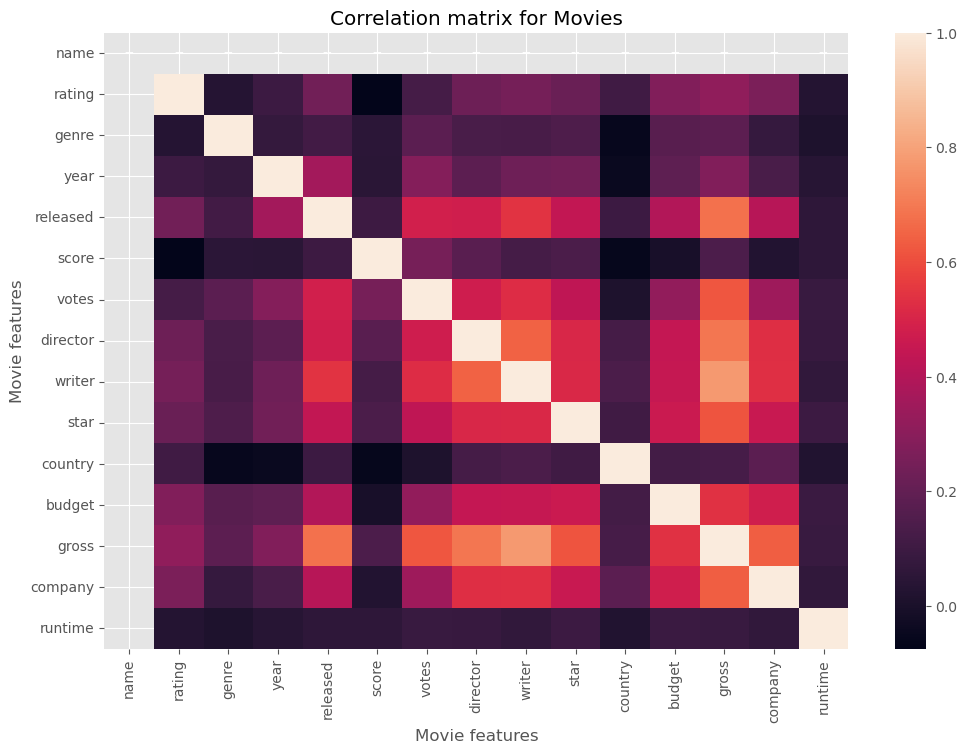

In [55]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [58]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name             NaN
         rating           NaN
         genre            NaN
         year             NaN
         released         NaN
                       ...   
runtime  country     0.018683
         budget      0.090684
         gross       0.087448
         company     0.067842
         runtime     1.000000
Length: 225, dtype: float64


In [59]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

score    rating    -0.074579
rating   score     -0.074579
score    country   -0.058417
country  score     -0.058417
genre    country   -0.056457
                      ...   
country  name            NaN
budget   name            NaN
gross    name            NaN
company  name            NaN
runtime  name            NaN
Length: 225, dtype: float64


In [60]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

director  star        0.506157
star      director    0.506157
writer    star        0.510510
star      writer      0.510510
writer    votes       0.523163
votes     writer      0.523163
director  company     0.527198
company   director    0.527198
writer    company     0.531137
company   writer      0.531137
gross     budget      0.534452
budget    gross       0.534452
writer    released    0.541143
released  writer      0.541143
star      gross       0.613920
gross     star        0.613920
          votes       0.620593
votes     gross       0.620593
company   gross       0.637522
gross     company     0.637522
writer    director    0.643213
director  writer      0.643213
released  gross       0.677864
gross     released    0.677864
director  gross       0.693318
gross     director    0.693318
          writer      0.775945
writer    gross       0.775945
rating    rating      1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star    

In [64]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()
# print(CompanyGrossSum.sort_values('gross', ascending = False)[:15])

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54773202654
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19628786232
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [65]:
df['Year'] = df['released'].astype(str).str[:4]
df

name     rating   genre  year                           released  \
5445  Avatar      PG-13  Action  2009  December 18, 2009 (United States)   
7445  Avatar      PG-13  Action  2019     April 26, 2019 (United States)   
3045  Avatar      PG-13   Drama  1997  December 19, 1997 (United States)   
6663  Avatar      PG-13  Action  2015  December 18, 2015 (United States)   
7244  Avatar      PG-13  Action  2018     April 27, 2018 (United States)   
...      ...        ...     ...   ...                                ...   
2434  Avatar      PG-13  Action  1993         June 4, 1994 (South Korea)   
3681  Avatar  Not Rated   Drama  2000              May 11, 2001 (Canada)   
272   Avatar          R  Horror  1982     March 12, 1982 (United States)   
2417  Avatar        NaN   Drama  1993             April 17, 1993 (Japan)   
3203  Avatar      PG-13  Comedy  1997           October 1, 1997 (Brazil)   

      score      votes          director              writer  \
5445    7.8  1100000.0     James Cameron       James Cameron   
7445    8.4   903000.0     Anthony Russo  Christopher Markus   
3045    7.8  1100000.0     James Cameron       James Cameron   
6663    7.8   876000.0       J.J. Abrams     Lawrence Kasdan   
7244    8.4   897000.0     Anthony Russo  Christopher Markus   
...     ...        ...               ...                 ...   
2434    4.5     1900.0  Stephen Cornwell  Wallace C. Bennett   
3681    6.8    43000.0      John Fawcett        Karen Walton   
272     3.9     2300.0      Charles Band       Alan J. Adler   
2417    7.3     5100.0    Akira Kurosawa        Ishirô Honda   
3203    5.7     5800.0      George Huang           Andy Burg   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   
...                 ...            ...        ...         ...   
2434       Brad Johnson  United States    5000000        2970   
3681      Emily Perkins         Canada    5000000        2554   
272     Robert Glaudini  United States     800000        2270   
2417   Tatsuo Matsumura          Japan   11900000         596   
3203       Will Friedle  United States   15000000         309   

                             company  runtime  Year  
5445           Twentieth Century Fox    162.0  Dece  
7445                  Marvel Studios    181.0  Apri  
3045           Twentieth Century Fox    194.0  Dece  
6663                       Lucasfilm    138.0  Dece  
7244                  Marvel Studios    149.0  Apri  
...                              ...      ...   ...  
2434                Trimark Pictures     97.0  June  
3681       Copperheart Entertainment    108.0  May   
272                 Embassy Pictures     85.0  Marc  
2417  DENTSU Music And Entertainment    134.0  Apri  
3203                        Daybreak     85.0  Octo  

[5436 rows x 16 columns]

In [66]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                             year           
"DIA" Productions GmbH & Co. KG     2003   44350926
"Weathering With You" Film Partners 2019  193457467
.406 Production                     1996      10580
1492 Pictures                       1996  129832389
                                    1999   87423861
...                                             ...
erbp                                2013     587174
i am OTHER                          2015   17986781
i5 Films                            2001   10031529
micro_scope                         2010    7099598
thefyzz                             2017   62198461

[2998 rows x 1 columns]

In [67]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Warner Bros.           2005    2688767210
Name: gross, dtype: int64

In [68]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54773202654
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19628786232
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [69]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
5445     0       5      0  2009       528    7.8  1100000.0       787    1265   
7445     0       5      0  2019       138    8.4   903000.0       106     515   
3045     0       5      6  1997       535    7.8  1100000.0       787    1265   
6663     0       5      0  2015       530    7.8   876000.0       770    1810   
7244     0       5      0  2018       146    8.4   897000.0       106     515   
...    ...     ...    ...   ...       ...    ...        ...       ...     ...   
2434     0       5      0  1993      1471    4.5     1900.0      1810    3112   
3681     0       3      6  2000      1726    6.8    43000.0       954    1687   
272      0       6      9  1982      1530    3.9     2300.0       263      55   
2417     0      -1      6  1993        64    7.3     5100.0        23    1220   
3203     0       5      4  1997      2158    5.7     5800.0       653     161   

      star  country     budget       gross  company  runtime  Year  
5445  1538       47  237000000  2847246203     1388    162.0     7  
7445  1474       47  356000000  2797501328      987    181.0     5  
3045  1076       47  200000000  2201647264     1388    194.0     7  
6663   357       47  245000000  2069521700      949    138.0     7  
7244  1474       47  321000000  2048359754      987    149.0     5  
...    ...      ...        ...         ...      ...      ...   ...  
2434   187       47    5000000        2970     1382     97.0    11  
3681   528        6    5000000        2554      468    108.0    13  
272   1477       47     800000        2270      584     85.0    12  
2417  1687       26   11900000         596      492    134.0     5  
3203  1818       47   15000000         309      506     85.0    15  

[5436 rows x 16 columns]

In [70]:
df_numerized.corr(method='pearson')

name    rating     genre      year  released     score     votes  \
name       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
rating     NaN  1.000000  0.128102  0.022668  0.018836  0.059550  0.009255   
genre      NaN  0.128102  1.000000 -0.073026  0.021712  0.034061 -0.136457   
year       NaN  0.022668 -0.073026  1.000000 -0.001481  0.055174  0.205758   
released   NaN  0.018836  0.021712 -0.001481  1.000000  0.046424  0.029029   
score      NaN  0.059550  0.034061  0.055174  0.046424  1.000000  0.473809   
votes      NaN  0.009255 -0.136457  0.205758  0.029029  0.473809  1.000000   
director   NaN  0.014847 -0.009303 -0.036936  0.003341  0.005573 -0.010198   
writer     NaN -0.006923  0.017500 -0.024568  0.008514  0.012860 -0.005394   
star       NaN  0.003737  0.002619 -0.032770  0.015363  0.009121 -0.017140   
country    NaN  0.020148 -0.010847 -0.066662 -0.017231 -0.044690  0.042146   
budget     NaN -0.186892 -0.368900  0.327781  0.019888  0.071792  0.440021   
gross      NaN -0.168814 -0.244380  0.274264  0.008614  0.222143  0.614904   
company    NaN -0.082189 -0.073293 -0.013062 -0.002927  0.021054  0.119366   
runtime    NaN  0.133239 -0.060186  0.074203  0.008619  0.414580  0.352437   
Year       NaN  0.016205  0.021016 -0.004720  0.996190  0.045603  0.027719   

          director    writer      star   country    budget     gross  \
name           NaN       NaN       NaN       NaN       NaN       NaN   
rating    0.014847 -0.006923  0.003737  0.020148 -0.186892 -0.168814   
genre    -0.009303  0.017500  0.002619 -0.010847 -0.368900 -0.244380   
year     -0.036936 -0.024568 -0.032770 -0.066662  0.327781  0.274264   
released  0.003341  0.008514  0.015363 -0.017231  0.019888  0.008614   
score     0.005573  0.012860  0.009121 -0.044690  0.071792  0.222143   
votes    -0.010198 -0.005394 -0.017140  0.042146  0.440021  0.614904   
director  1.000000  0.262940  0.036289  0.011108 -0.009340 -0.029366   
writer    0.262940  1.000000  0.019273  0.022153 -0.039420 -0.035999   
star      0.036289  0.019273  1.000000 -0.010135 -0.021282 -0.000009   
country   0.011108  0.022153 -0.010135  1.000000  0.054372  0.060929   
budget   -0.009340 -0.039420 -0.021282  0.054372  1.000000  0.740395   
gross    -0.029366 -0.035999 -0.000009  0.060929  0.740395  1.000000   
company  -0.007337 -0.002658  0.015086  0.049559  0.171385  0.150233   
runtime   0.018082 -0.016672  0.012439 -0.033554  0.318595  0.275596   
Year      0.004565  0.008114  0.014537 -0.016941  0.018254  0.006973   

           company   runtime      Year  
name           NaN       NaN       NaN  
rating   -0.082189  0.133239  0.016205  
genre    -0.073293 -0.060186  0.021016  
year     -0.013062  0.074203 -0.004720  
released -0.002927  0.008619  0.996190  
score     0.021054  0.414580  0.045603  
votes     0.119366  0.352437  0.027719  
director -0.007337  0.018082  0.004565  
writer   -0.002658 -0.016672  0.008114  
star      0.015086  0.012439  0.014537  
country   0.049559 -0.033554 -0.016941  
budget    0.171385  0.318595  0.018254  
gross     0.150233  0.275596  0.006973  
company   1.000000  0.038752 -0.002808  
runtime   0.038752  1.000000  0.006846  
Year     -0.002808  0.006846  1.000000

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


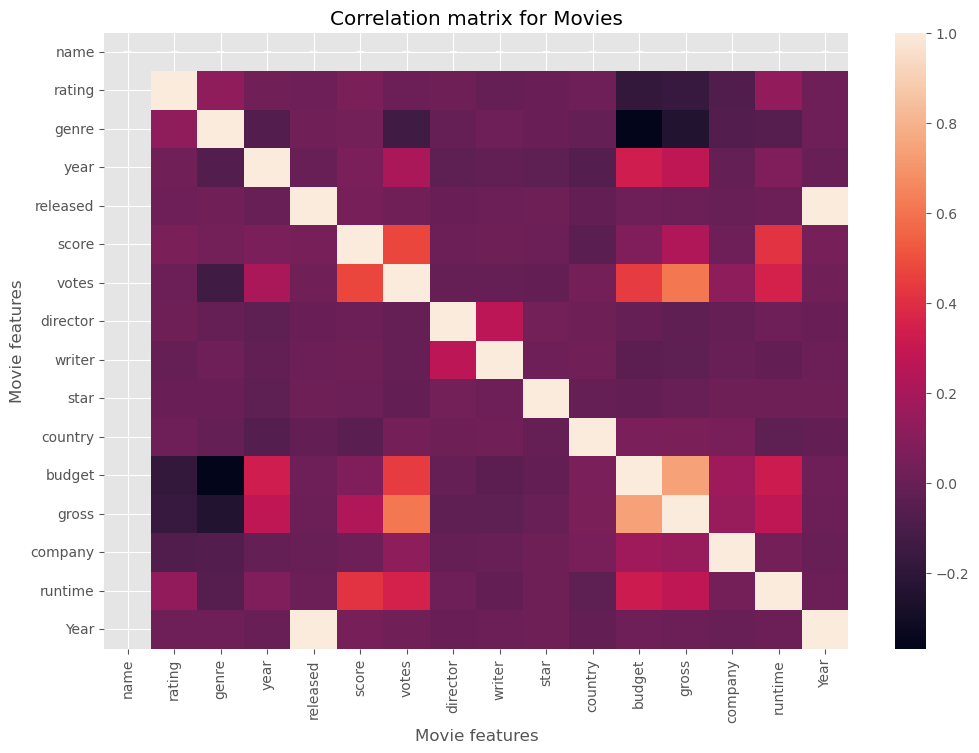

In [74]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [5]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='gross'>

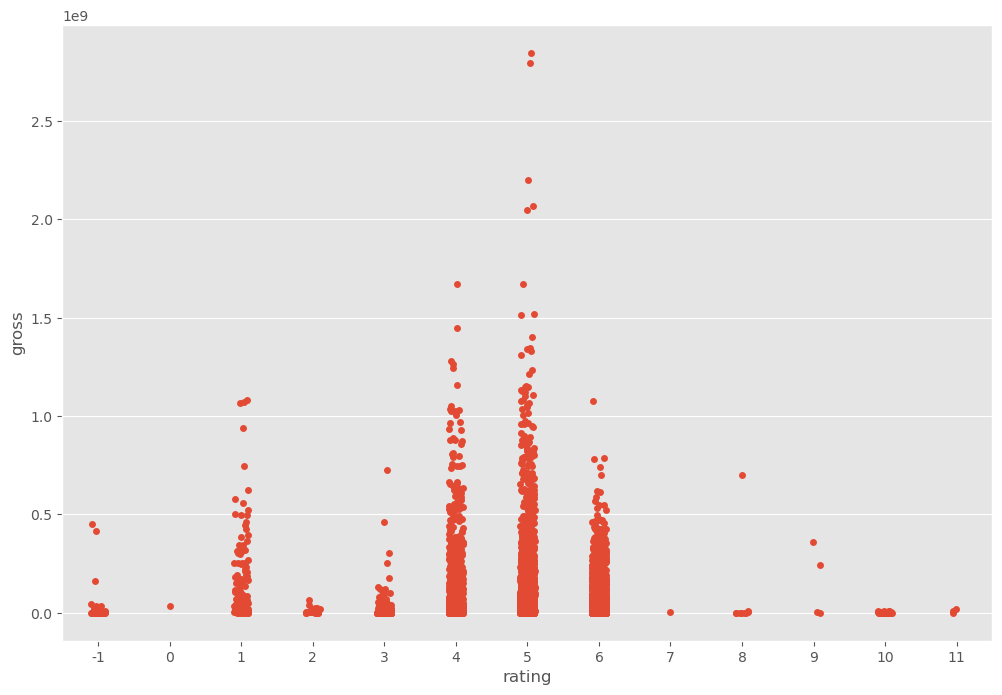

In [6]:
sns.stripplot(x="rating", y="gross", data=df)
# plt.title("Strip Plot of Rating vs Gross")
# plt.xlabel("Rating")
# plt.ylabel("Gross")

# # Show the plot
# plt.show()